Importing libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
from sklearn import svm
from sklearn.metrics import mean_squared_error


Reading data from local file to pandas data frame

In [ ]:
df2 = pd.read_csv('german_credit_data.csv')

Using head method, viewing first five records of data

In [ ]:
df2.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2


Looking into Atrributes of data

In [ ]:

df2.columns


Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Class'],
      dtype='object')

In [ ]:
df2.describe

<bound method NDFrame.describe of      Age     Sex  Job  ... Duration              Purpose Class
0     67    male    2  ...        6             radio/TV     1
1     22  female    2  ...       48             radio/TV     2
2     49    male    1  ...       12            education     1
3     45    male    2  ...       42  furniture/equipment     1
4     53    male    2  ...       24                  car     2
..   ...     ...  ...  ...      ...                  ...   ...
995   31  female    1  ...       12  furniture/equipment     1
996   40    male    3  ...       30                  car     1
997   38    male    2  ...       12             radio/TV     1
998   23    male    2  ...       45             radio/TV     2
999   27    male    2  ...       45                  car     1

[1000 rows x 10 columns]>

Info method is used to know about data types of each and every attributes

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Class             1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


checking for null values

In [ ]:
df2.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Class                 0
dtype: int64

In [ ]:
print(df2.dtypes)

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Class                int64
dtype: object


visualising null values using heatmap and filling them with most freguently repeated values which is mode in terms of statistics

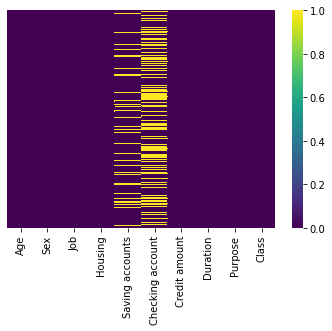

In [ ]:
sns.heatmap(df2.isnull(), yticklabels=False, cmap='viridis')
df2['Saving accounts'].fillna('little', inplace=True)
df2['Checking account'].fillna('little', inplace=True)


In [ ]:
df2.isnull().sum()


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Class               0
dtype: int64

getting dummies for categorical data, this can be done using label enconding and one hot encoding, but in this we proceed with dummies 

In [ ]:
ndf2 = pd.get_dummies(data=creditdata, columns=['Sex','Housing', 'Saving accounts', 'Checking account','Class' ], drop_first=True)
ndf2.drop(['Purpose'], axis=1, inplace=True)
ndf2.rename(columns = {'Sex_male':'Sex', 'Class_2':'Class'}, inplace = True)

In [ ]:
df2.head()

,Age,Job,Credit amount,Duration,Sex,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Class
0,67,2,1169,6,1,1,0,0,0,0,0,0,0
1,22,2,5951,48,0,1,0,0,0,0,1,0,1
2,49,1,2096,12,1,1,0,0,0,0,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0
4,53,2,4870,24,1,0,0,0,0,0,0,0,1


dividing data into dependent(Class) and independent variables(remaining features) and splitting each of thgem into train and test with test size of 30%

In [ ]:
X= ndf2.drop('Class', axis=1)
y= ndf2['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=1)

Building model using Logistic regression as this data is of classification and traning model with train data of dependent and independent data

In [ ]:
#Importing the Logistic regression algorithm
from sklearn.linear_model import LogisticRegression
lorgmodel = LogisticRegression()
ModelTrain = lorgmodel.fit(X_train, y_train)
ModelTrain.coef_


array([[-2.27664693e-02, -8.42701014e-02,  1.57059336e-05,
         3.49590994e-02, -3.59667710e-01, -5.42256790e-01,
         1.89903478e-01, -1.48807859e-02, -1.44797479e-01,
        -3.27667495e-01,  3.00005544e-01, -5.16905940e-02]])

predicting classes using trained data with test data of independent features

In [ ]:
predicted = ModelTrain.predict(X_test)

using seaborn ploting line graph between actual ground truth and predicted values  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


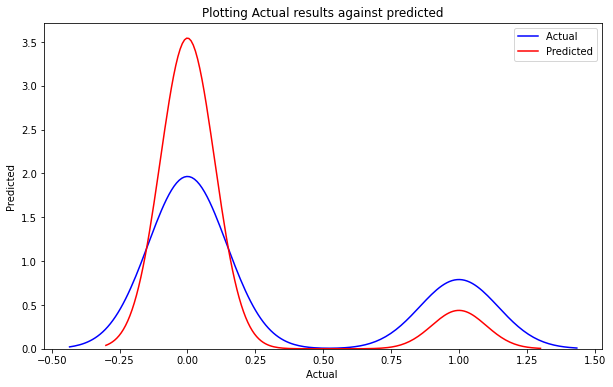

In [ ]:
plt.figure(figsize=(10, 6))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual ")
sns.distplot(predicted, hist=False, color="r", label="Predicted" , ax=ax1)
plt.title('Plotting Actual results against predicted')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.legend(loc="upper right")


calculating accuracy of logistic regression model on actual test and predicted values and we get some better accuarcy which is around 72%

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is :",accuracy_score(y_test, predicted))


Accuracy is : 0.7233333333333334


ploting confusion matrix for visualising true possitives and negatives and false positives and negatives on which matrics will depends 

[[199  15]
 [ 68  18]]


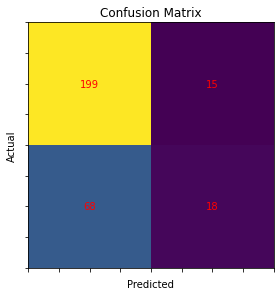

In [ ]:
crosstb_matrix = pd.crosstab(index =y_test , columns = predicted)
print(crosstb_matrix.values)
fig, ax = plt.subplots()
im = ax.imshow(crosstb_matrix.values)
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, crosstb_matrix.values[i, j],horizontalalignment='center',verticalalignment='center', color="r")
fig.tight_layout()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error",mean_squared_error(y_test, predicted))


Mean Squared Error 0.27666666666666667


In [ ]:
from sklearn.metrics import log_loss
print("log loss",log_loss(y_test, predicted))

log loss 9.5557681157968


In [ ]:
ytest=np.array(y_test)
ytest1 = ytest[1:20]
ytest1

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=uint8)

In [ ]:
y_predicted= np.array(predicted)
ypredicted1= y_predicted[1:20]
ypredicted1


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
      dtype=uint8)

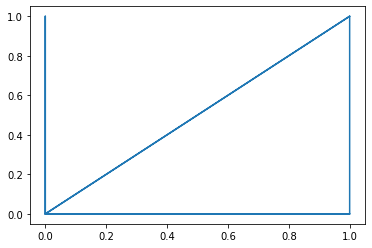

In [ ]:
plt.plot(ytest1, ypredicted1)
plt.show()

building model using support vector manchines which is one of the classification algorithm

In [ ]:
svmmodel = svm.SVR()
ModelTrain1 = svmmodel.fit(X_train, y_train)
predicted1 = ModelTrain1.predict(X_test)


In [ ]:
#Checking for the error of prediction
from sklearn.metrics import mean_squared_error
print("Mean Squared Error",mean_squared_error(y_test, predicted1))


Mean Squared Error 0.2340025944359387


In [ ]:
print("log loss",log_loss(y_test, predicted1))

log loss 0.7228514872139349


In [ ]:
ytest1=np.array(y_test)
ytest2 = ytest1[1:20]
ytest2


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=uint8)

In [ ]:
y_predicted1= np.array(predicted1)
ypredicted2= y_predicted1[1:20]
ypredicted2


array([0.90435192, 0.10020473, 0.09976797, 0.10058678, 0.09973551,
       0.10192948, 0.09963661, 0.09981902, 0.10032565, 0.10028416,
       0.0997198 , 0.09671731, 0.09984167, 0.09541932, 0.10027809,
       0.10037453, 0.10020686, 0.10033498, 0.14800145])

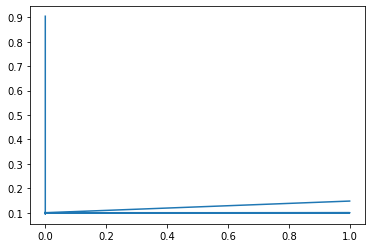

In [ ]:
plt.plot(ytest2, ypredicted2)
plt.show()
